#Import Libraries

In [1]:
!pip install pycountry-convert
!pip install pycountry
!pip install jupyter-dash

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash
import plotly 
import plotly.express as px
import pycountry
import pycountry_convert as pc

from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate
from dash import html
from dash import dcc
#from ipykernel import kernelapp as app
#import dash_html_components as html
#import dash_core_components as dcc

#Create External Stylesheet

In [3]:
externalStylesheet = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

#Build Dash App

In [4]:
app = JupyterDash(__name__, external_stylesheets=externalStylesheet)

#Import Dataframe

In [5]:
from google.colab import drive
drive.mount('/content/drive')

#import dataframe titled GlobalTemperatures
path = "/content/drive/MyDrive/IVP Coursework/Dataset/GlobalTemperatures.csv"
#import dataframe titled GlobalLandTemperaturesByCountry
df = pd.read_csv(path)
path = "/content/drive/MyDrive/IVP Coursework/Dataset/GlobalLandTemperaturesByCountry.csv"
dfCountry = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploratory Data Analysis

In [6]:
#display dataframe
print(df)

              dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncerta

In [7]:
#display dataframe
print(dfCountry)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...      

In [8]:
#check info summary & make sure all columns are in numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [9]:
#check info summary & make sure all columns are in numeric
dfCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [10]:
#check for percentage of missing values
print('Percentage of missing values for GlobalTemperatures Dataset:', (df.isnull().sum(axis = 0).LandAverageTemperature)*100/len(df.LandAverageTemperature))
print('Percentage of missing values for GlobalLandTemperaturesByCountry Dataset:', (dfCountry.isnull().sum(axis = 0).AverageTemperature)*100/len(dfCountry.AverageTemperature))

Percentage of missing values for GlobalTemperatures Dataset: 0.37593984962406013
Percentage of missing values for GlobalLandTemperaturesByCountry Dataset: 5.654224866744478


In [11]:
#view the earliest and latest date in the dataframe
print (df.dt.min())
print (df.dt.max())

1750-01-01
2015-12-01


In [12]:
#view the earliest and latest date in the dataframe
print (dfCountry.dt.min())
print (dfCountry.dt.max())

1743-11-01
2013-09-01


In [13]:
#create new columns that contain year and month in each column
df['dt'] = pd.to_datetime(df['dt'])
df['month'] = df['dt'].map(lambda x: x.month)
df['year'] = df['dt'].map(lambda x: x.year)

In [14]:
#create new columns that contain year and month in each column
dfCountry['dt'] = pd.to_datetime(dfCountry['dt'])
dfCountry['month'] = dfCountry['dt'].map(lambda x: x.month)
dfCountry['year'] = dfCountry['dt'].map(lambda x: x.year)

In [15]:
#change of order in dataframe columns
df = df.reindex(columns=['dt', 'month', 'year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
                         'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                         'LandAndOceanAverageTemperatureUncertainty'])
dfCountry = dfCountry.reindex(columns=['dt', 'month', 'year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'])

In [16]:
#check for number of NaN values in each column
df.isna().sum()

dt                                              0
month                                           0
year                                            0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [17]:
#check for number of NaN values in each column
dfCountry.isna().sum()

dt                                   0
month                                0
year                                 0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [18]:
#drop NaN values & create new dataframes
dfNew = df[df['LandAverageTemperature'].notna()]
dfNew = dfNew[dfNew['LandAverageTemperatureUncertainty'].notna()]
dfNew2 = dfNew.dropna()

In [19]:
#drop NaN values
dfCountry = dfCountry[dfCountry['AverageTemperature'].notna()]

#Plot Visualisations

##Line Chart

In [20]:
#calculate average temperature for each year
yeaR = np.unique(dfNew['year'])
avg_tempY = []
for y in yeaR:
    avg_tempY.append(dfNew[dfNew['year'] == y]['LandAverageTemperature'].mean())

#create new dataframe consists of Year and Average Temperature for the respective year
dfYearsAvgTemp = pd.DataFrame(yeaR)
dfYearsAvgTemp.columns =['Year']
dfYearsAvgTemp['AvgTemp'] = avg_tempY

#plot a line chart
fig = px.line(dfYearsAvgTemp, x = "Year", y = "AvgTemp",
              title = 'Land Average Temperature VS Year')
fig.show()

In [21]:
#allocate season in the dataframe based on the month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

dfNew['season'] = dfNew['month'].apply(get_season)

#calculate mean for LandAverageTemperature for each year and season and append to a list according to its season
yearMin = dfNew['year'].min()
yearMax = dfNew['year'].max()
years = range(yearMin, yearMax + 1)

spring = []
summer = []
autumn = []
winter = []

for year in years:
    currentYear = dfNew[dfNew['year'] == year]
    spring.append(currentYear[currentYear['season'] == 'spring']['LandAverageTemperature'].mean())
    summer.append(currentYear[currentYear['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn.append(currentYear[currentYear['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter.append(currentYear[currentYear['season'] == 'winter']['LandAverageTemperature'].mean())

In [22]:
#create a new dataframe where it consists of land average temperature for each seasons' year
dfYSe = dfNew.groupby(['year','season'],as_index=False).LandAverageTemperature.mean()

#create a line plot
fig = px.line(dfYSe, x = "year", y = "LandAverageTemperature", 
              color = 'season', color_discrete_sequence = ['lightslategrey', 'darkgreen', 'orange', 'steelblue'],
              title = 'Land Average Temperature VS Year for Each Season')

#display a line plot
fig.show()

In [23]:
#create the app layout                          
app.layout = html.Div(children=[
    html.H1(children='Land Average Temperature VS Year'),
    dcc.Dropdown(id='season-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in dfYSe['season'].unique()],
                 value='autumn'),
    dcc.Graph(id='avgTemp-graph')
])

#adding the callback function
@app.callback(
    Output(component_id='avgTemp-graph', component_property='figure'),
    Input(component_id='season-dropdown', component_property='value')
)

def update_graph(selected_season):
    filtered_season = dfYSe[dfYSe['season'] == selected_season]
    line_fig = px.line(filtered_season,
                       x='year', y='LandAverageTemperature', markers=False,
                       title=f'Land Average Temperature in {selected_season}')
    return line_fig

#run the dashboard app
if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

##PairPlot & Heat Map

In [24]:
#rename columns names for GlobalTemperatures dataset
dfTemp = dfNew
dfTemp.columns = ['date', 'month', 'year', 'LandAvgTemp', 'LandAvgTempU',
                   'LandMaxTemp','LandMaxTempU', 'LandMinTemp', 'LandMinTempU',
                   'LandOceanAvgTemp', 'LandOceanAvgTempU', 'season']

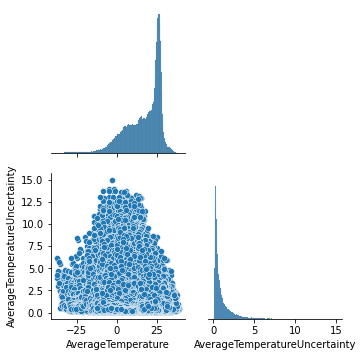

In [25]:
sns.pairplot(dfCountry, corner=True,  
             x_vars=["AverageTemperature", "AverageTemperatureUncertainty"],
             y_vars=["AverageTemperature", "AverageTemperatureUncertainty"])

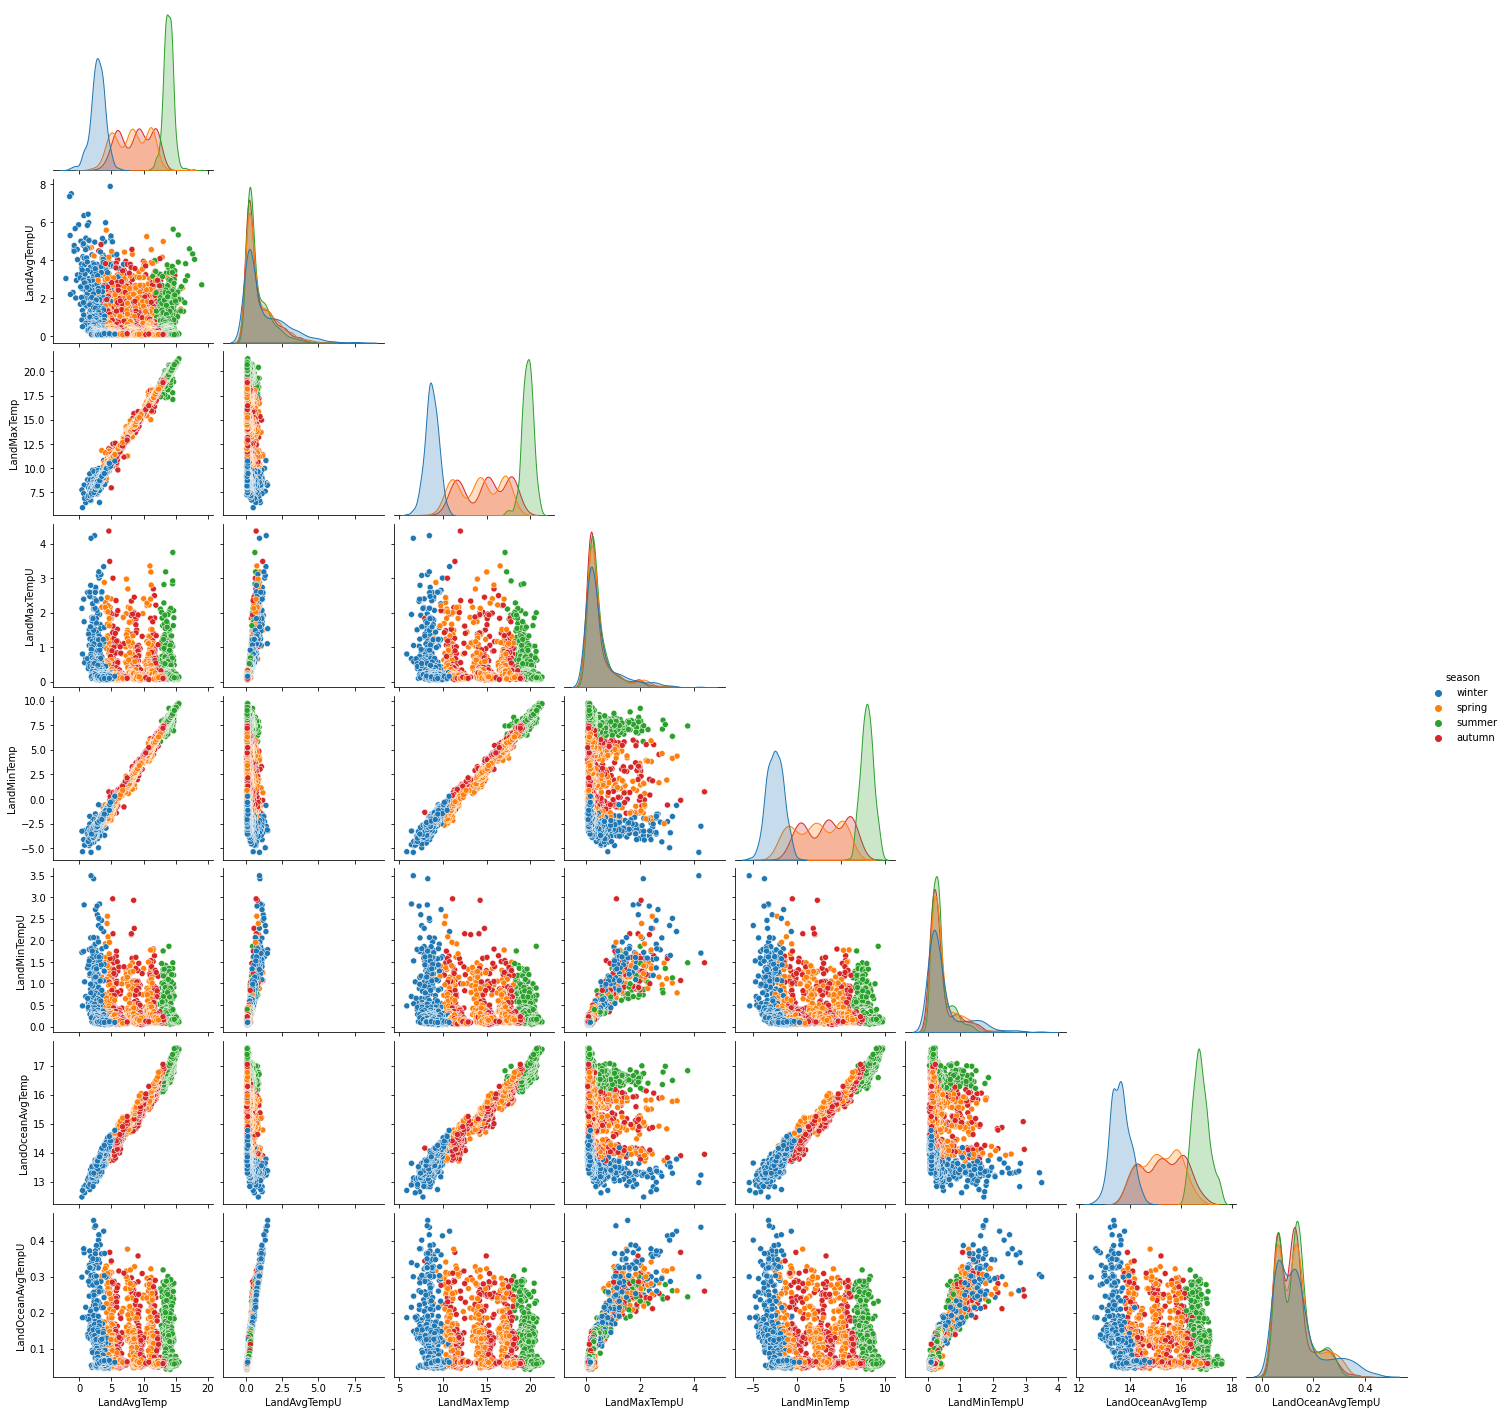

In [26]:
#create a pairplot with hue
sns.pairplot(dfTemp, hue='season', corner=True,
             x_vars=["LandAvgTemp", "LandAvgTempU", "LandMaxTemp", "LandMaxTempU", "LandMinTemp", "LandMinTempU", "LandOceanAvgTemp", "LandOceanAvgTempU"],
             y_vars=["LandAvgTemp", "LandAvgTempU", "LandMaxTemp", "LandMaxTempU", "LandMinTemp", "LandMinTempU", "LandOceanAvgTemp", "LandOceanAvgTempU"])

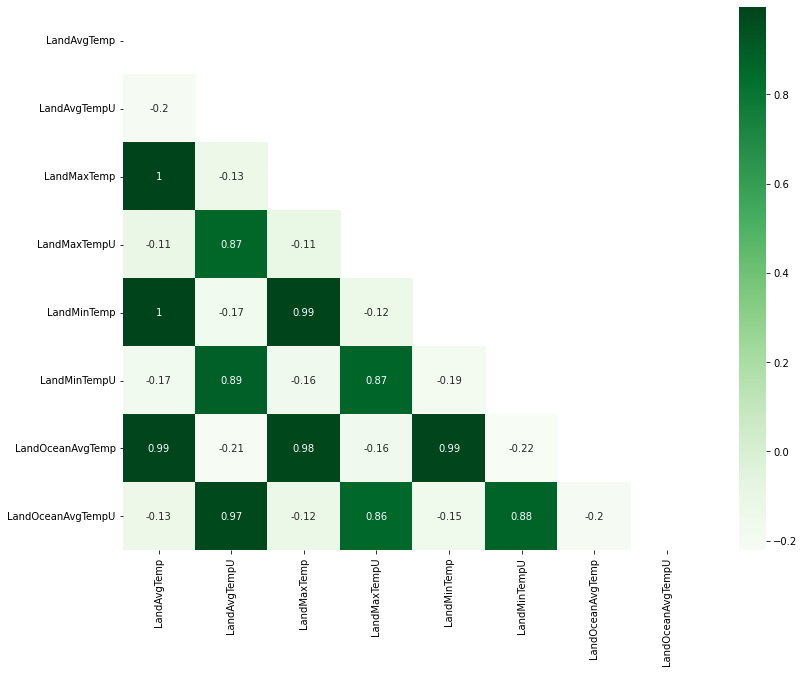

In [27]:
# get correlations
df_corr = dfNew.corr()
# irrelevant fields
fields = ['month', 'year']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)
#retrieve the upper triangle of the corelations matrix
matrix = np.triu(df_corr)

#create heatmap
ax = plt.subplots(figsize=(13, 10))
ax = sns.heatmap(df_corr, annot=True, mask=matrix, cmap="Greens")

##Choropleth Map

In [28]:
#allocate new column in the dataframe that contains ISO Alpha (country code)
def findCountryAlpha(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("NaN")

dfCountry['isoAlpha'] = dfCountry.apply(lambda dfCountry: findCountryAlpha(dfCountry.Country), axis = 1)

In [29]:
app.layout = html.Div([
                       html.Div([
                                 dcc.Input(id='input_state', type='number', inputMode='numeric', value=2010,
                                           max=2013, min=1743, step=None, required=True),
                                 html.Button(id='submit_button', n_clicks=0, children='Submit'),
                                 html.Div(id='output_state'),
                                  ],style={'text-align': 'center'}),
                       html.Div([
                                 dcc.Graph(id='the_graph')])
])

@app.callback(
    [Output('output_state', 'children'),
    Output(component_id='the_graph', component_property='figure')],
    [Input(component_id='submit_button', component_property='n_clicks')],
    [State(component_id='input_state', component_property='value')]
)

def update_output(num_clicks, val_selected):
  if val_selected is None:
    raise PreventUpdate
  else:
    filtered_year = dfCountry[dfCountry['year'] == val_selected]
    fig = px.choropleth(filtered_year, locations="isoAlpha",
    color="AverageTemperature",
    hover_name="Country",
    projection='natural earth',
    title='Average Land Temperature in The World',
    color_continuous_scale=px.colors.sequential.Jet)

    fig.update_layout(title=dict(font=dict(size=28),x=0.5,xanchor='center'),
                      margin=dict(l=60, r=60, t=50, b=50))
    return ('The input value was "{}" and the button has been \
                clicked {} times'.format(val_selected, num_clicks), fig)

#run the dashboard app
if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

##Horizontal Bar Plot

In [30]:
#Calculate average temperature for each country
countries = np.unique(dfCountry['Country'])
avg_temp = []
for country in countries:
    avg_temp.append(dfCountry[dfCountry['Country'] == country]['AverageTemperature'].mean())

In [31]:
#create new dataframe consists of Country and Average Temperature for the respective Country
dfCountriesAvgTemp = pd.DataFrame(countries)
dfCountriesAvgTemp.columns =['Country']
dfCountriesAvgTemp['AvgTemp'] = avg_temp

In [32]:
#check if duplicated rows exixt
dfCountriesAvgTemp['Country'].is_unique

True

In [33]:
#create horizontal bar plot
fig = px.bar(dfCountriesAvgTemp, x="AvgTemp", y="Country", 
             orientation='h', color = 'AvgTemp',
             color_continuous_scale=px.colors.sequential.thermal,
             width=1000, height=3500,
             title="Land Average Temperature VS Countries Around the World")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})
fig.show()

In [34]:
#change all "And" and "Of" to lowercase
dfCountriesAvgTemp=dfCountriesAvgTemp.replace(regex=['And'],value='and')
dfCountriesAvgTemp=dfCountriesAvgTemp.replace(regex=['Of'],value='of')

In [35]:
#remove some unqualified data and edit some data in the dataframe
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Africa'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Asia'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Europe'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == "Côte D'Ivoire"], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Burma'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Baker Island'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Bonaire, Saint Eustatius and Saba'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'French Southern and Antarctic Lands'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Gaza Strip'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Kingman Reef'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Heard Island and Mcdonald Islands'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'North America'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'South America'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Oceania'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Palestina'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Palmyra Atoll'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Saint Vincent and The Grenadines'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Reunion'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Sint Maarten'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'South Georgia and The South Sandwich Isla'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Timor Leste'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Turks and Caicas Islands'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Virgin Islands'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Åland'], inplace = True)
dfCountriesAvgTemp.drop(dfCountriesAvgTemp.index[dfCountriesAvgTemp['Country'] == 'Western Sahara'], inplace = True)

dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['Congo (Democratic Republic of The)'],'Congo')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['Denmark (Europe)'],'Denmark')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['Falkland Islands (Islas Malvinas)'],'Falkland Islands')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['France (Europe)'],'France')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['Guinea Bissau'],'Guinea-Bissau')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['andorra'],'Andorra')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['Netherlands (Europe)'],'Netherlands')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['North America'],'North America')
dfCountriesAvgTemp['Country'] = dfCountriesAvgTemp['Country'].replace(['United Kingdom (Europe)'],'United Kingdom')

In [36]:
#insert continent name column
def convert(row):
  #convert country name to country code
  countryCode = pc.country_name_to_country_alpha2(row.Country, cn_name_format= "default")
  #convert country code to continent code
  continentCode = pc.country_alpha2_to_continent_code(countryCode)
  return continentCode

dfCountriesAvgTemp['Continent'] = dfCountriesAvgTemp.apply(convert, axis=1)

In [37]:
#map continent code to a continent name
contNames = {"AS" : "Asia",
             "SA"	: "South America",
             "OC" : "Oceania",
             "EU"	: "Europe",
             "NA"	: "North America",
             "AF" : "Africa",
             "AN"	: "Antarctica"}

dfCountriesAvgTemp['Continent'] = dfCountriesAvgTemp['Continent'].map(contNames)

In [38]:
#remove null values
dfCountriesAvgTemp = dfCountriesAvgTemp.dropna()

In [39]:
#check value of random country row
dfCountriesAvgTemp.loc[dfCountriesAvgTemp['Country'] == 'Ireland']

,Country,AvgTemp,Continent
106,Ireland,9.419558,Europe


In [40]:
cont_options = [{'label': i, 'value': i} for i in dfCountriesAvgTemp['Continent'].unique()]

app.layout = html.Div([
                       html.H1('Average Temperatures VS Countries'),
                       html.P(['This dashboard shows a horizontal bar graph.']),
                       dcc.RadioItems(id='cont-Radio', options=cont_options, value='Oceania'),
                       dcc.Graph(id='avgTemp-graph', figure={})
])

@app.callback(
    Output(component_id='avgTemp-graph', component_property='figure'),
    Input(component_id='cont-Radio', component_property='value'))
def update_graph(selected_continent):
    filtered_continent = dfCountriesAvgTemp[dfCountriesAvgTemp['Continent'] == selected_continent]
    bar_fig = px.bar(filtered_continent, x="AvgTemp", y="Country",
                     orientation='h', color='AvgTemp',
                     color_continuous_scale=px.colors.sequential.thermal,
                     width=1200, height=800,
                     title=f'Average Temperatures in {selected_continent}')
    bar_fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})
    return bar_fig

#run the dashboard app
if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

##Scatter Plot

In [41]:
fig = px.scatter(dfCountriesAvgTemp, 
                 x="Country",y="AvgTemp", facet_col="Continent",size_max=45, title=f'Average Temperatures VS Countries in Selected Continent')
fig.show()

In [41]:
cont_options = [{'label': i, 'value': i} for i in dfCountriesAvgTemp['Continent'].unique()]

app.layout = html.Div([html.H1('Average Temperatures VS Countries'), html.P(['This dashboard shows a scatter plot.']), dcc.Dropdown(id='cont-dropdown',options=cont_options, value='Oceania'), dcc.Graph(id='avgTemp-graph', figure={})])

@app.callback(
    Output(component_id='avgTemp-graph', component_property='figure'),
    Input(component_id='cont-dropdown', component_property='value'))
def update_graph(selected_continent):
    filtered_continent = dfCountriesAvgTemp[dfCountriesAvgTemp['Continent'] == selected_continent]
    scatter_fig = px.scatter(filtered_continent, x="Country", y="AvgTemp", size='AvgTemp', marginal_y="violin",
                             title=f'Average Temperatures in {selected_continent}')
    return scatter_fig

#run the dashboard app
if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>